## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = 'medv')
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg_tree = DecisionTreeRegressor(max_depth=8)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [6]:
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.31926121e-05, 5.27704485e-05, 1.18733509e-04,
        3.29815303e-04, 4.74934037e-04, 8.44327177e-04, 8.44327177e-04,
        1.42480211e-03, 1.59630607e-03, 1.59630607e-03, 1.75901495e-03,
        1.89973615e-03, 1.93931398e-03, 2.22955145e-03, 2.53298153e-03,
        3.16622691e-03, 3.20580475e-03, 3.81266491e-03, 3.81266491e-03,
        3.82208820e-03, 4.80870712e-03, 5.81794195e-03, 6.75461741e-03,
        7.14379947e-03, 8.24538259e-03, 1.09938434e-02, 1.16865701e-02,
        1.18346526e-02, 1.19063325e-02, 1.21053379e-02, 1.46358839e-02,
        1.55145119e-02, 1.63632366e-02, 1.74472296e-02, 1.97889182e-02,
        2.34124890e-02, 2.55790614e-02, 2.74511873e-02, 2.77374670e-02,
        3.18456178e-02, 3.28661033e-02, 3.56728232e-02, 3.65933744e-02,
        3.66015831e-02, 3.77088830e-02, 4.18040897e-02, 4.31138229e-02,
        5.19615948e-02, 5.29481608e-02, 5.33311346e-02, 5.54098505e-02,
        6.34517527e-02, 6.35444151e-02, 6.59641077

In [7]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 1.31926121e-05, 5.27704485e-05, 1.18733509e-04,
       3.29815303e-04, 4.74934037e-04, 8.44327177e-04, 8.44327177e-04,
       1.42480211e-03, 1.59630607e-03, 1.59630607e-03, 1.75901495e-03,
       1.89973615e-03, 1.93931398e-03, 2.22955145e-03, 2.53298153e-03,
       3.16622691e-03, 3.20580475e-03, 3.81266491e-03, 3.81266491e-03,
       3.82208820e-03, 4.80870712e-03, 5.81794195e-03, 6.75461741e-03,
       7.14379947e-03, 8.24538259e-03, 1.09938434e-02, 1.16865701e-02,
       1.18346526e-02, 1.19063325e-02, 1.21053379e-02, 1.46358839e-02,
       1.55145119e-02, 1.63632366e-02, 1.74472296e-02, 1.97889182e-02,
       2.34124890e-02, 2.55790614e-02, 2.74511873e-02, 2.77374670e-02,
       3.18456178e-02, 3.28661033e-02, 3.56728232e-02, 3.65933744e-02,
       3.66015831e-02, 3.77088830e-02, 4.18040897e-02, 4.31138229e-02,
       5.19615948e-02, 5.29481608e-02, 5.33311346e-02, 5.54098505e-02,
       6.34517527e-02, 6.35444151e-02, 6.59641077e-02, 8.69678631e-02,
      

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
ccp_alpha_trees = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    ccp_alpha_trees.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
score_trees = []

for clf in ccp_alpha_trees:
    score_trees.append(clf.score(X_train, y_train))
    
score_trees

[1.0,
 0.9999966686388571,
 0.9999895828865847,
 0.9999602616206515,
 0.9998899699005347,
 0.9998118574135441,
 0.9996888720207449,
 0.9996649179477645,
 0.9994212526755921,
 0.999365941504869,
 0.9993467465192356,
 0.9992645200656272,
 0.9991810245220594,
 0.9990190569160126,
 0.9989654378652351,
 0.9989266750987928,
 0.9985308494657585,
 0.9984541224019734,
 0.998183504831792,
 0.9981145615197567,
 0.998068602333376,
 0.9973475922907704,
 0.9968329330020894,
 0.9965063855798297,
 0.9961130117580917,
 0.9954657194748858,
 0.994220080038737,
 0.994311750636792,
 0.9936628960457834,
 0.993743594303566,
 0.9935980321257998,
 0.9927279045462156,
 0.9916827132600655,
 0.991072018629732,
 0.9908622221958466,
 0.9901725761183536,
 0.9888651747505679,
 0.9888651747505679,
 0.9879120424888388,
 0.9865880196510906,
 0.9862299670705929,
 0.9850599286389113,
 0.9837736379782689,
 0.9828964782509474,
 0.9824563578530862,
 0.9824563578530862,
 0.9815002439853636,
 0.9794645688990764,
 0.97775108554

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0, 0.5, 'MSE')

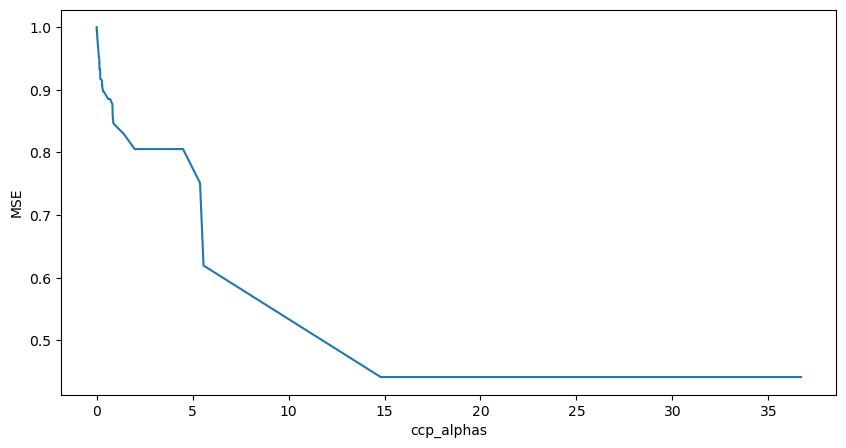

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, score_trees)
plt.xlabel("ccp_alphas")
plt.ylabel("MSE")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [40]:
reg_tree_alpha = DecisionTreeRegressor(ccp_alpha=1)
reg_tree_alpha.fit(X_train, y_train)

reg_tree_alpha.score(X_train, y_train)

0.8462519236985399

### 7. Visualize esta árvore.

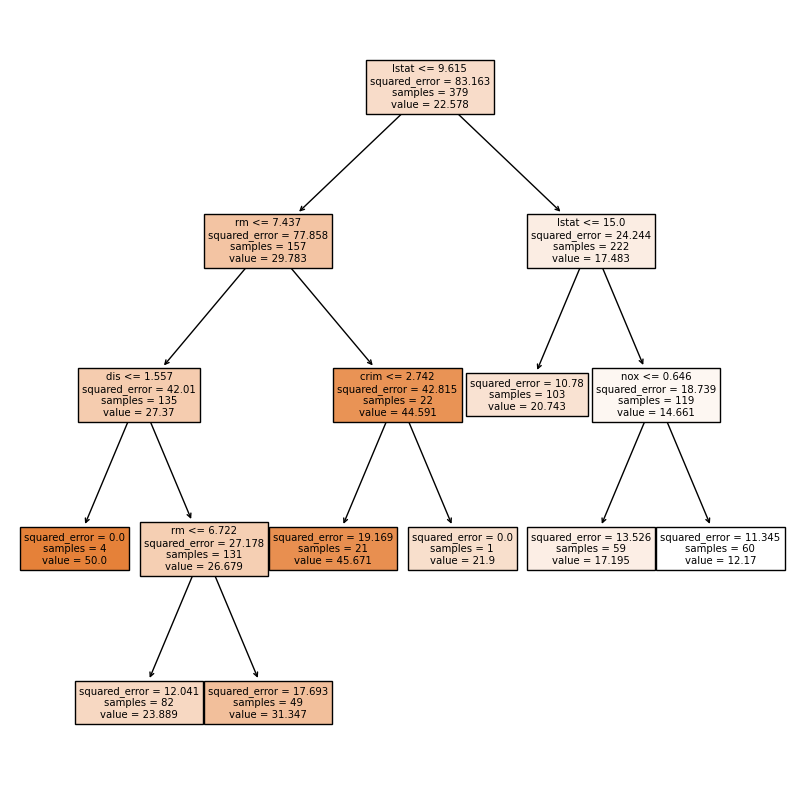

In [41]:
plt.rc('figure',figsize=(10,10))

tp = tree.plot_tree(reg_tree_alpha,
                    feature_names=list(X.columns),
                    filled=True)